In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [4]:
i_1 = np.asarray(Image.open('Image_1.png').convert('L'))
i_2 = np.asarray(Image.open('Image_2.png').convert('L'))
i_3 = np.asarray(Image.open('Image_3.png').convert('L'))

In [5]:
i_1

array([[255,   0,   0,   0, 255],
       [  0, 255, 255, 255,   0],
       [  0, 255, 255, 255,   0],
       [  0, 255, 255, 255,   0],
       [  0, 255, 255, 255,   0],
       [  0, 255, 255, 255,   0],
       [255,   0,   0,   0, 255]], dtype=uint8)

In [6]:
i_1 = np.where(i_1 > 0, 1, -1).flatten()
i_2 = np.where(i_2 > 0, 1, -1).flatten()
i_3 = np.where(i_3 > 0, 1, -1).flatten()

In [7]:
def hlr(input_1,input_2,input_3,output_1,output_2,output_3):
  w = np.zeros((35, 35))
  st_1 = np.outer(input_1, output_1)
  st_2 = np.outer(input_2, output_2)
  st_3 = np.outer(input_3, output_3)
  w = st_1 + st_2 + st_3
  return w

In [8]:
w_hlr = hlr(i_1,i_2,i_3,i_1,i_2,i_3)

In [9]:
def mhlr(input_1,input_2,input_3,output_1,output_2,output_3):
  w = np.zeros((35, 35))
  st_1 = np.outer(input_1, output_1)
  st_2 = np.outer(input_2, output_2)
  st_3 = np.outer(input_3, output_3)
  d = np.zeros((35, 35), int) # Create matrix with only 0
  np.fill_diagonal(d, 1)
  w = st_1 + st_2 + st_3 - d
  return w

In [10]:
w_mhlr = mhlr(i_1,i_2,i_3,i_1,i_2,i_3)

In [11]:
w_hlr

array([[ 3, -1, -3, ..., -3, -3,  1],
       [-1,  3,  1, ...,  1,  1,  1],
       [-3,  1,  3, ...,  3,  3, -1],
       ...,
       [-3,  1,  3, ...,  3,  3, -1],
       [-3,  1,  3, ...,  3,  3, -1],
       [ 1,  1, -1, ..., -1, -1,  3]])

In [12]:
w_mhlr

array([[ 2, -1, -3, ..., -3, -3,  1],
       [-1,  2,  1, ...,  1,  1,  1],
       [-3,  1,  2, ...,  3,  3, -1],
       ...,
       [-3,  1,  3, ...,  2,  3, -1],
       [-3,  1,  3, ...,  3,  2, -1],
       [ 1,  1, -1, ..., -1, -1,  2]])

In [13]:
def plot_out(input_1,input_2,input_3,output_1,output_2,output_3,w): 
  test_1 = np.sign(np.inner(input_1.reshape((1,35)), w.T) )
  test_2 = np.sign(np.inner(input_2.reshape((1,35)), w.T))
  test_3= np.sign(np.inner(input_3.reshape((1,35)), w.T))
  plt.subplot(3, 3, 1)
  plt.imshow(input_1.reshape((7,5)),cmap="gray")
  plt.title('input')
  plt.subplot(3, 3, 2)
  plt.imshow(test_1.reshape((7,5)),cmap="gray")
  plt.title('predicted_output')
  plt.subplot(3, 3, 3)
  plt.imshow(output_1.reshape((7,5)),cmap="gray")
  plt.title('output')
  plt.subplot(3, 3, 4)
  plt.imshow(input_2.reshape((7,5)),cmap="gray")
  plt.subplot(3, 3, 5)
  plt.imshow(test_2.reshape((7,5)),cmap="gray")
  plt.subplot(3, 3, 6)
  plt.imshow(output_2.reshape((7,5)),cmap="gray")
  plt.subplot(3, 3, 7)
  plt.imshow(input_3.reshape((7,5)),cmap="gray")
  plt.subplot(3, 3, 8)
  plt.imshow(test_3.reshape((7,5)),cmap="gray")
  plt.subplot(3, 3, 9)
  plt.imshow(output_3.reshape((7,5)),cmap="gray")
  


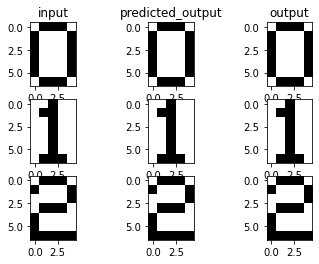

In [14]:
plot_out(i_1,i_2,i_3,i_1,i_2,i_3,w_hlr)

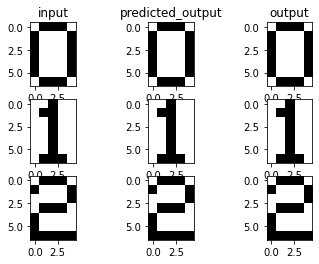

In [15]:
plot_out(i_1,i_2,i_3,i_1,i_2,i_3,w_mhlr)

In [16]:
def replaceRandom(arr, perc):
    temp = arr   
    shape = temp.shape[0]      
    noise = round((perc * shape)/100 )
    temp = temp.flatten()    # Flatten to 1D
    inds = np.random.randint(0,shape,noise)   # Get random indices
    # Fill with something
    for i in inds:
      if arr[i] == 1:
        temp[i] = -1
      else:
        temp[i] = 1
    return temp

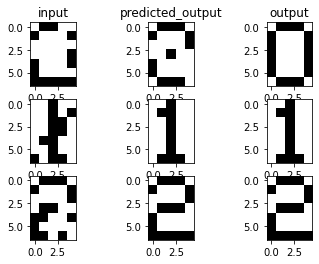

In [17]:
i_1_noise = replaceRandom(i_1, 20)
i_2_noise = replaceRandom(i_2, 20)
i_3_noise = replaceRandom(i_3, 20)
plot_out(i_1_noise,i_2_noise,i_3_noise,i_1,i_2,i_3,w_hlr)

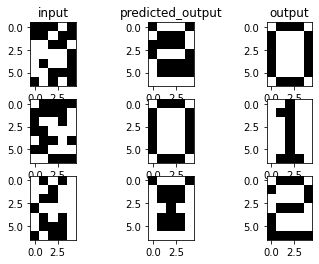

In [18]:
i_1_noise = replaceRandom(i_1, 80)
i_2_noise = replaceRandom(i_2, 80)
i_3_noise = replaceRandom(i_3, 80)
plot_out(i_1_noise,i_2_noise,i_3_noise,i_1,i_2,i_3,w_hlr)

# 4

In [19]:
def replaceRandom_zero(arr, perc):
    temp = arr   
    shape = temp.shape[0]      
    noise = round((perc * shape)/100 )
    temp = temp.flatten()    # Flatten to 1D
    inds = np.random.randint(0,shape,noise)   # Get random indices
    # Fill with something
    for i in inds:
      temp[i] = 0

    return temp

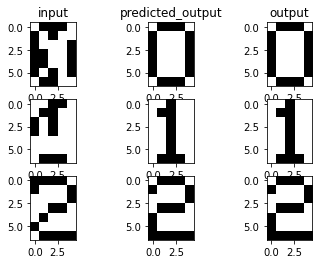

In [20]:
i_1_noise = replaceRandom(i_1, 20)
i_2_noise = replaceRandom(i_2, 20)
i_3_noise = replaceRandom(i_3, 20)
plot_out(i_1_noise,i_2_noise,i_3_noise,i_1,i_2,i_3,w_hlr)

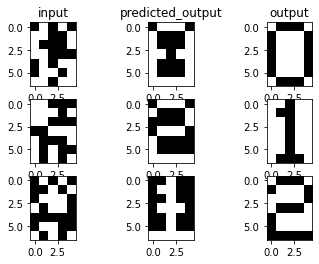

In [21]:
i_1_noise = replaceRandom(i_1, 80)
i_2_noise = replaceRandom(i_2, 80)
i_3_noise = replaceRandom(i_3, 80)
plot_out(i_1_noise,i_2_noise,i_3_noise,i_1,i_2,i_3,w_hlr)

#5